# Understanding Sports Markets
- Chapter 1 Miller
- CHL team valuation model

# Objectives
1. Examine and interpret salary distributions
2. Examine relationship between salary and winning percentage
3. Calculate and/or estimation team values
4. Implement and interpret visualization techniques
5. Use histograms to explain differences in salary distributions across sports

# modules
 - note, seaborn library may no be avaialbel on campus computers

In [45]:
%matplotlib inline
import os
import sys
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn
seaborn.set(color_codes=True)


Set some Pandas options
- congigure display option for your working environment and preferences

In [46]:
pandas.set_option('display.notebook_repr_html', False)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 25)

# file management
- observe working directory
- change working directory
- note the difference in paths on windows, mac, and linux operating systems

In [47]:
os.chdir('/home/vmuser/Documents/4P94/02-sports_markets')
print('working directory: ', os.getcwd())
PATH_WORK =  os.getcwd()
print('working directory: ', PATH_WORK)

('working directory: ', '/home/vmuser/Documents/4P94/02-sports_markets')
('working directory: ', '/home/vmuser/Documents/4P94/02-sports_markets')


Examine files in directory

In [48]:
list_files = os.listdir(PATH_WORK)
print list_files
print ('number of files in list is: ',len(list_files))

['mlb_payroll_performance_2014.csv', 'mlb_player_salaries_2015.csv', 'nba_player_salaries_2015.csv', 'nfl_player_salaries_2015.csv', 'homework', '02a-player_salaries.ipynb', '.ipynb_checkpoints']
('number of files in list is: ', 7)


# Load data

In [49]:
dmlb = pandas.read_csv('mlb_payroll_performance_2014.csv')

In [50]:
# Examine and clean data

In [51]:
dmlb.head()

  team    payroll league  games  wins  losses  wlpct  runs  averuns  rundiff  \
0  LAA  128046500     AL    162    98      64  0.605   4.8      3.9      0.9   
1  BAL  105084121     AL    162    96      66  0.593   4.4      3.7      0.7   
2  WSN  134366735     NL    162    96      66  0.593   4.2      3.4      0.8   
3  LAD  241128402     NL    162    94      68  0.580   4.4      3.8      0.6   
4  STL  114020360     NL    162    90      72  0.556   3.8      3.7      0.1   

  textleft textright  
0      LAA       NaN  
1      BAL       NaN  
2      WSN       NaN  
3      LAD       NaN  
4      STL       NaN  

In [52]:
dmlb.columns

Index([u'team', u'payroll', u'league', u'games', u'wins', u'losses', u'wlpct',
       u'runs', u'averuns', u'rundiff', u'textleft', u'textright'],
      dtype='object')

# Descriptive statistics 
- all data and across leagues

In [53]:
dmlb.describe()

            payroll  games       wins     losses      wlpct       runs  \
count  3.000000e+01   30.0  30.000000  30.000000  30.000000  30.000000   
mean   1.127207e+08  162.0  81.000000  81.000000   0.500000   4.066667   
std    4.477529e+07    0.0   9.598851   9.598851   0.059286   0.355580   
min    4.498580e+07  162.0  64.000000  64.000000   0.395000   3.300000   
25%    8.263719e+07  162.0  73.000000  74.000000   0.451000   3.825000   
50%    9.890170e+07  162.0  80.500000  81.500000   0.497000   4.000000   
75%    1.316001e+08  162.0  88.000000  89.000000   0.543000   4.350000   
max    2.411284e+08  162.0  98.000000  98.000000   0.605000   4.800000   

         averuns       rundiff  
count  30.000000  3.000000e+01  
mean    4.073333  2.590520e-17  
std     0.433059  4.989644e-01  
min     3.400000 -8.000000e-01  
25%     3.800000 -4.000000e-01  
50%     3.950000 -5.000000e-02  
75%     4.400000  3.000000e-01  
max     5.000000  1.000000e+00  

In [54]:
print('prepare data')
dmlb['payroll_adj'] = dmlb['payroll']/1000000

prepare data


In [55]:
dmlb.describe()

            payroll  games       wins     losses      wlpct       runs  \
count  3.000000e+01   30.0  30.000000  30.000000  30.000000  30.000000   
mean   1.127207e+08  162.0  81.000000  81.000000   0.500000   4.066667   
std    4.477529e+07    0.0   9.598851   9.598851   0.059286   0.355580   
min    4.498580e+07  162.0  64.000000  64.000000   0.395000   3.300000   
25%    8.263719e+07  162.0  73.000000  74.000000   0.451000   3.825000   
50%    9.890170e+07  162.0  80.500000  81.500000   0.497000   4.000000   
75%    1.316001e+08  162.0  88.000000  89.000000   0.543000   4.350000   
max    2.411284e+08  162.0  98.000000  98.000000   0.605000   4.800000   

         averuns       rundiff  payroll_adj  
count  30.000000  3.000000e+01    30.000000  
mean    4.073333  2.590520e-17   112.720745  
std     0.433059  4.989644e-01    44.775293  
min     3.400000 -8.000000e-01    44.985800  
25%     3.800000 -4.000000e-01    82.637189  
50%     3.950000 -5.000000e-02    98.901704  
75%     4.4

In [56]:
dmlb.groupby(['league'])['payroll_adj'].mean()

league
AL    111.804347
NL    113.637143
Name: payroll_adj, dtype: float64

(array([ 2.,  7.,  7.,  4.,  4.,  2.,  2.,  0.,  1.,  1.]),
 array([  44.9858   ,   64.6000602,   84.2143204,  103.8285806,
         123.4428408,  143.057101 ,  162.6713612,  182.2856214,
         201.8998816,  221.5141418,  241.128402 ]),
 <a list of 10 Patch objects>)

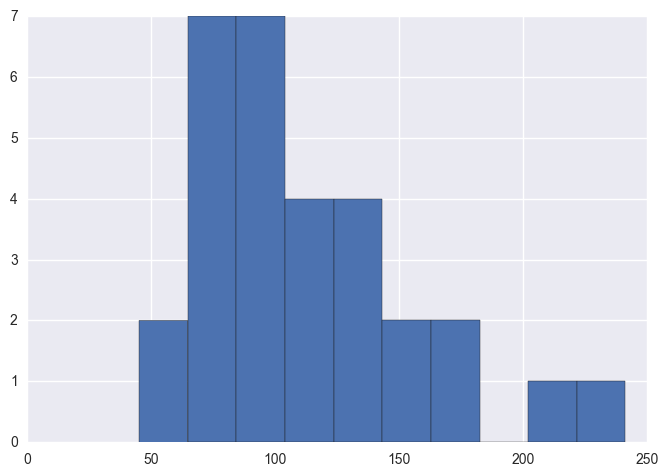

In [57]:
plt.hist(dmlb['payroll_adj'])

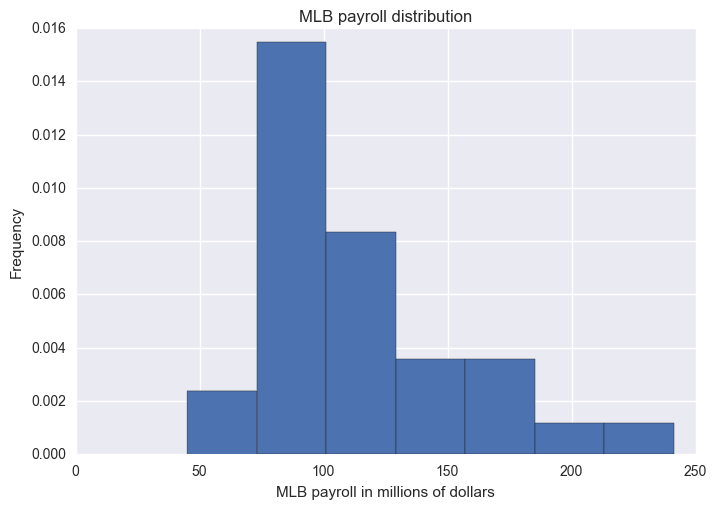

In [58]:
plt.hist(dmlb['payroll_adj'], bins=7, normed=True)
plt.title("MLB payroll distribution")
plt.xlabel("MLB payroll in millions of dollars")
plt.ylabel("Frequency")
plt.show()

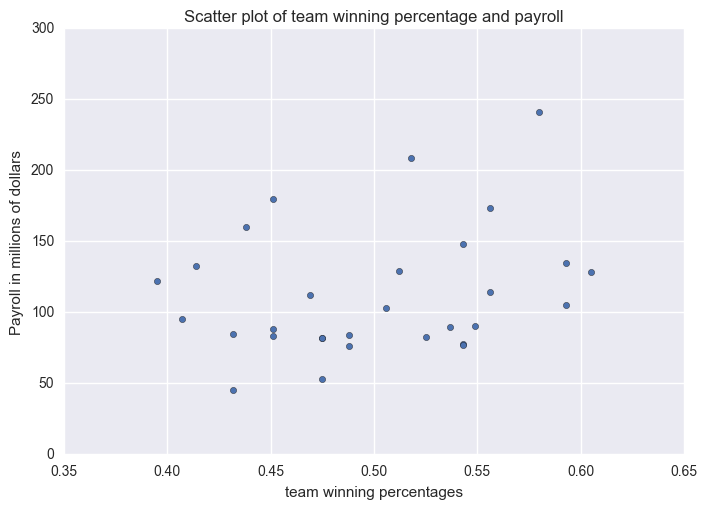

In [59]:
plt.scatter(dmlb['wlpct'], dmlb['payroll_adj'])
plt.title("Scatter plot of team winning percentage and payroll")
plt.xlabel("team winning percentages")
plt.ylabel("Payroll in millions of dollars")
plt.show()

Seaborn histogram

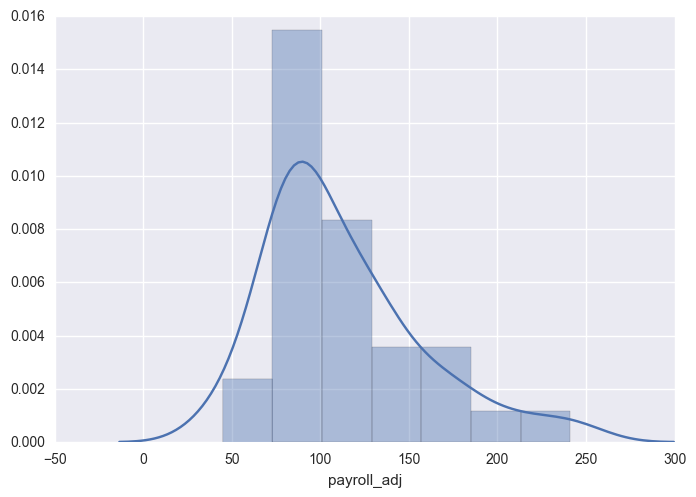

In [60]:
seaborn.distplot(dmlb['payroll_adj'])